In [4]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv(next(iter(uploaded)))

Saving first inten project.csv to first inten project.csv


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.utils import resample

# Load the dataset
df = pd.read_csv('first inten project.csv')

# Display initial information
print("Initial Dataset Overview:")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nData Types:")
print(df.dtypes)
print("\nSummary Statistics:")
print(df.describe(include='all'))

Initial Dataset Overview:
Shape: (36285, 17)

First 5 rows:
  Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time m

In [6]:
# Check for missing values
print("\nMissing Values Before Handling:")
print(df.isnull().sum())

# Fill missing numerical values with median
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical values with mode
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values Before Handling:
Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

Missing Values After Handling:
Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price         

In [7]:
# Check for duplicates
print(f"\nNumber of duplicates before: {df.duplicated().sum()}")

# Remove duplicates
df = df.drop_duplicates()

print(f"Number of duplicates after: {df.duplicated().sum()}")
print(f"New shape: {df.shape}")


Number of duplicates before: 0
Number of duplicates after: 0
New shape: (36285, 17)


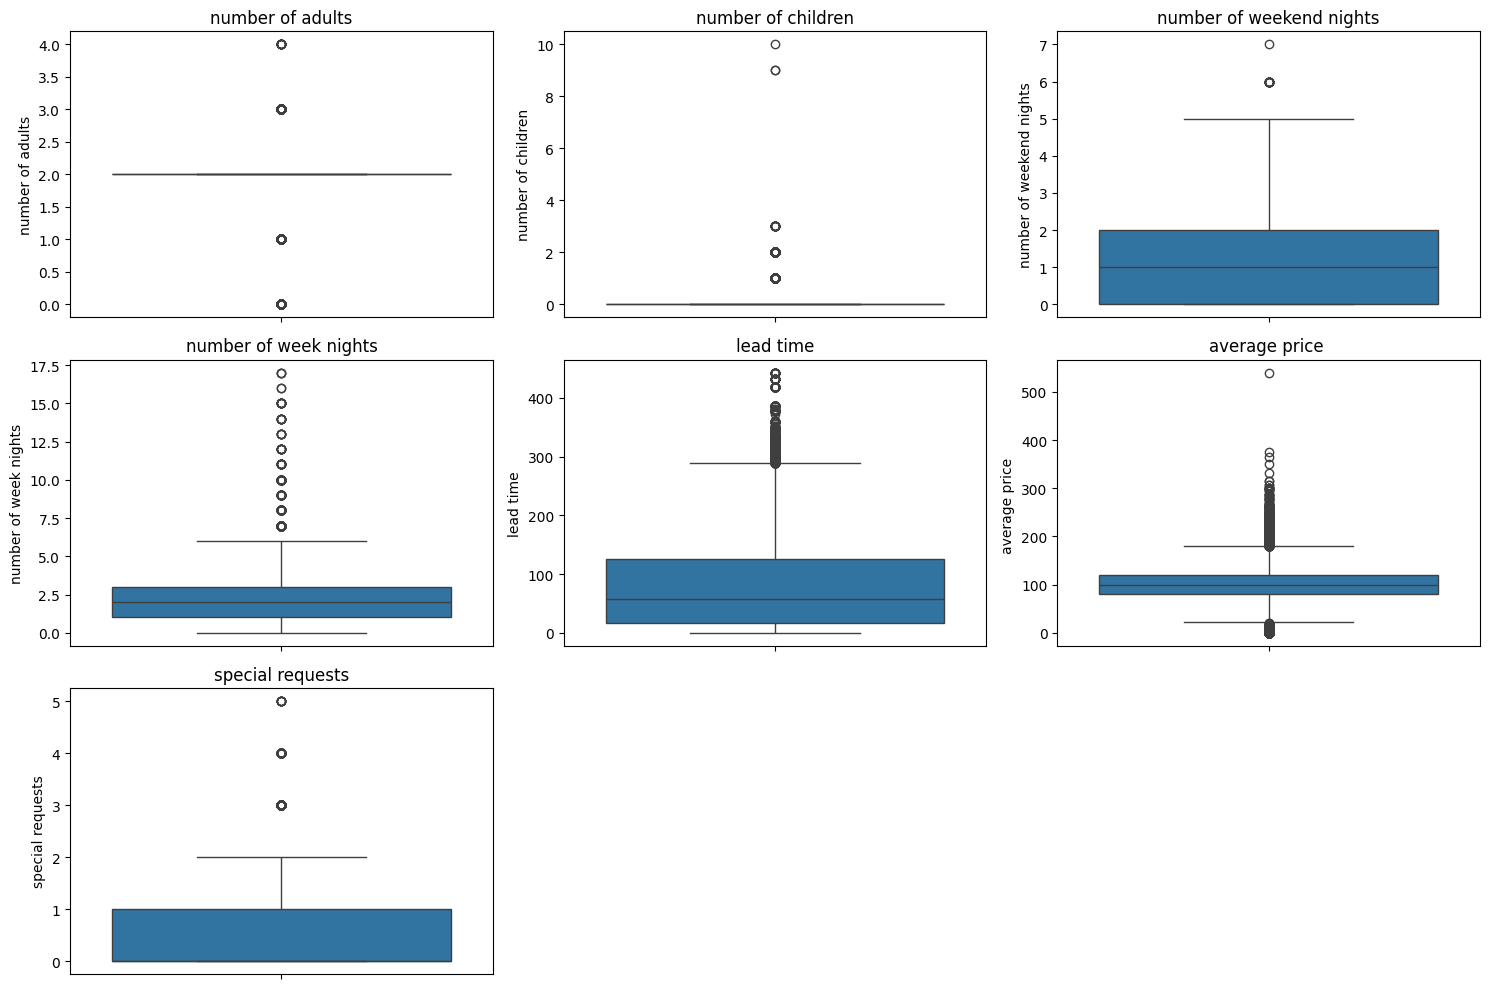


Data after outlier treatment:
       number of adults  number of children  number of weekend nights  \
count           36285.0             36285.0              36285.000000   
mean                2.0                 0.0                  0.810087   
std                 0.0                 0.0                  0.867286   
min                 2.0                 0.0                  0.000000   
25%                 2.0                 0.0                  0.000000   
50%                 2.0                 0.0                  1.000000   
75%                 2.0                 0.0                  2.000000   
max                 2.0                 0.0                  5.000000   

       number of week nights     lead time  average price   special requests  
count           36285.000000  36285.000000    36285.000000      36285.000000  
mean                2.178145     83.767893      102.968399          0.606642  
std                 1.290708     81.662186       31.678904          0.7469

In [9]:
# Visualize numerical columns for outliers
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['number of adults', 'number of children', 'number of weekend nights',
            'number of week nights', 'lead time', 'average price ', 'special requests']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(col)
plt.tight_layout()
plt.show()

# Apply IQR method to handle outliers
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

print("\nData after outlier treatment:")
print(df[num_cols].describe())

In [10]:
# Check categorical columns
print("\nCategorical columns before encoding:")
print(df.select_dtypes(include='object').columns)

# Apply label encoding
label_encoder = LabelEncoder()
categorical_cols = ['type of meal', 'room type', 'market segment type', 'booking status']

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

print("\nAfter encoding:")
print(df[categorical_cols].head())


Categorical columns before encoding:
Index(['Booking_ID', 'type of meal', 'room type', 'market segment type',
       'date of reservation', 'booking status'],
      dtype='object')

After encoding:
   type of meal  room type  market segment type  booking status
0             0          0                    3               1
1             3          0                    4               1
2             0          0                    4               0
3             0          0                    4               0
4             3          0                    4               0


In [12]:
# Select numerical columns to normalize
num_cols = ['number of adults', 'number of children', 'number of weekend nights',
            'number of week nights', 'lead time', 'average price ', 'special requests']

# Apply Min-Max scaling
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("\nAfter normalization:")
print(df[num_cols].describe())


After normalization:
       number of adults  number of children  number of weekend nights  \
count           36285.0             36285.0              36285.000000   
mean                0.0                 0.0                  0.162017   
std                 0.0                 0.0                  0.173457   
min                 0.0                 0.0                  0.000000   
25%                 0.0                 0.0                  0.000000   
50%                 0.0                 0.0                  0.200000   
75%                 0.0                 0.0                  0.400000   
max                 0.0                 0.0                  1.000000   

       number of week nights     lead time  average price   special requests  
count           36285.000000  36285.000000    36285.000000      36285.000000  
mean                0.363024      0.289354        0.517748          0.242657  
std                 0.215118      0.282080        0.199489          0.298780  
min 

In [13]:
# Check class distribution
print("\nClass distribution before balancing:")
print(df['booking status'].value_counts())

# Separate majority and minority classes
df_majority = df[df['booking status'] == 0]
df_minority = df[df['booking status'] == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),  # to match majority
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

print("\nClass distribution after balancing:")
print(df_balanced['booking status'].value_counts())


Class distribution before balancing:
booking status
1    24396
0    11889
Name: count, dtype: int64

Class distribution after balancing:
booking status
0    11889
1    11889
Name: count, dtype: int64


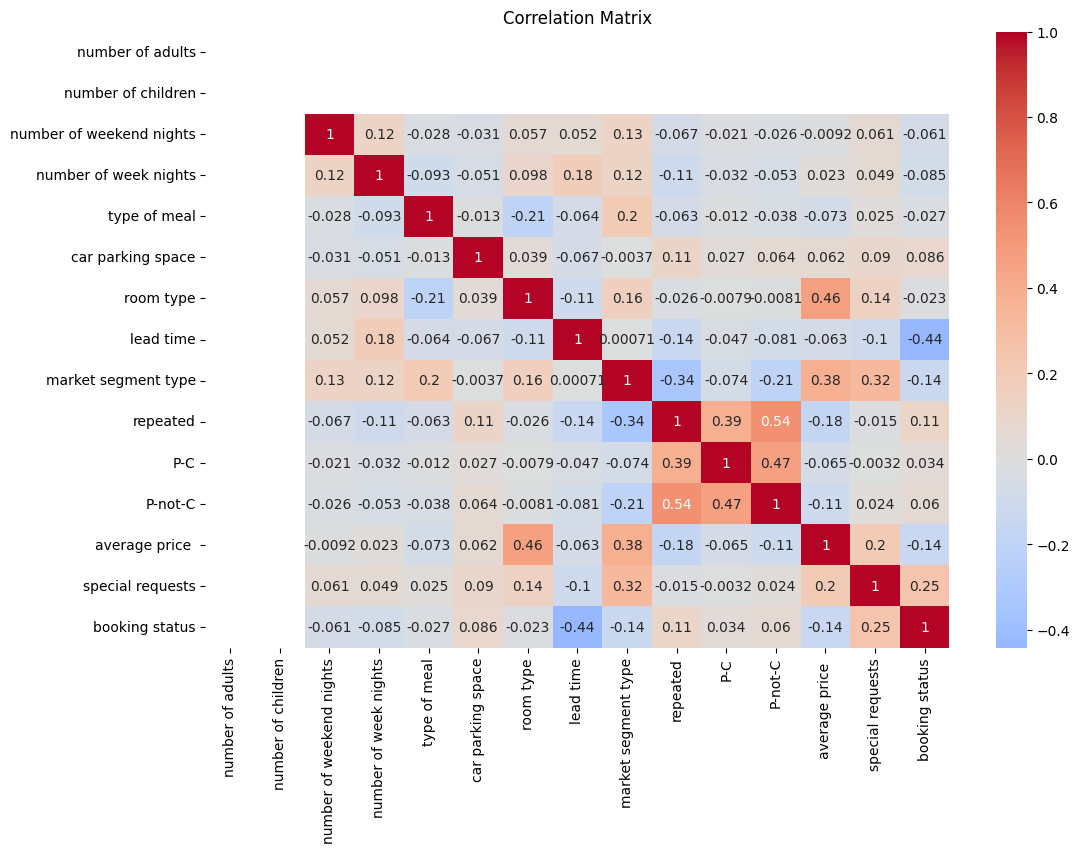


Highly correlated features:
[]

Final features after multicollinearity check:
Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')


In [16]:
# Calculate correlation matrix
# Drop non-numeric columns before calculating correlation
corr_matrix = df.drop(['Booking_ID', 'date of reservation'], axis=1).corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

# Identify highly correlated features (threshold > 0.8)
high_corr = np.where((corr_matrix > 0.8) & (corr_matrix < 1))
high_corr = [(corr_matrix.columns[x], corr_matrix.columns[y])
             for x, y in zip(*high_corr) if x < y]

print("\nHighly correlated features:")
print(high_corr)

# Remove one of each highly correlated pair
# (In this case, we'll keep all features as none have extreme correlation)
print("\nFinal features after multicollinearity check:")
print(df.columns)

In [17]:
print("\nFinal Preprocessed Dataset:")
print(df.head())
print(f"\nFinal shape: {df.shape}")
print("\nData Types:")
print(df.dtypes)


Final Preprocessed Dataset:
  Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001               0.0                 0.0                       0.4   
1   INN00002               0.0                 0.0                       0.2   
2   INN00003               0.0                 0.0                       0.2   
3   INN00004               0.0                 0.0                       0.0   
4   INN00005               0.0                 0.0                       0.2   

   number of week nights  type of meal  car parking space  room type  \
0               0.833333             0                  0          0   
1               0.500000             3                  0          0   
2               0.500000             0                  0          0   
3               0.333333             0                  0          0   
4               0.333333             3                  0          0   

   lead time  market segment type  repeated  P-C  P-not-C

In [19]:
# Sample outputs you can show:

# Assuming 'df' is the DataFrame after duplicate removal
# We need the initial number of rows before removing duplicates to calculate the number of duplicates removed.
# This variable should be defined before this cell is executed.
# For demonstration purposes, let's assume we store the initial shape before removing duplicates.
# If you want to show the number of duplicates removed, you need to capture the initial shape earlier in your notebook.

# To fix the error in this cell, we can either remove the line that uses initial_rows or define it.
# Since the previous cells already handled duplicate removal, we can't get the *original* initial_rows here.
# However, if you want to show the *current* number of duplicates (which should be 0 after previous steps),
# you can use the duplicated().sum() method again.

# Let's remove the line causing the error, as duplicate removal status was already shown in a previous cell.

print("1. Missing Values:\n", df.isnull().sum())
# print("\n2. Duplicates Removed:", initial_rows - len(df)) # Removed this line
print("\n3. Outlier Treatment Summary:\n", df[num_cols].describe())
print("\n4. Encoded Categories:\n", df[categorical_cols].head())
print("\n5. Normalized Features:\n", df[num_cols].head())
print("\n6. Class Distribution:\n", df_balanced['booking status'].value_counts())
print("\n7. Top Correlations:\n", corr_matrix[abs(corr_matrix) > 0.7].stack())

1. Missing Values:
 Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

3. Outlier Treatment Summary:
        number of adults  number of children  number of weekend nights  \
count           36285.0             36285.0              36285.000000   
mean                0.0                 0.0                  0.162017   
std                 0.0                 0.0                  0.173457   
min                 0.0                 0.0                  0.000000   
25%                 0.0                 0.0                 

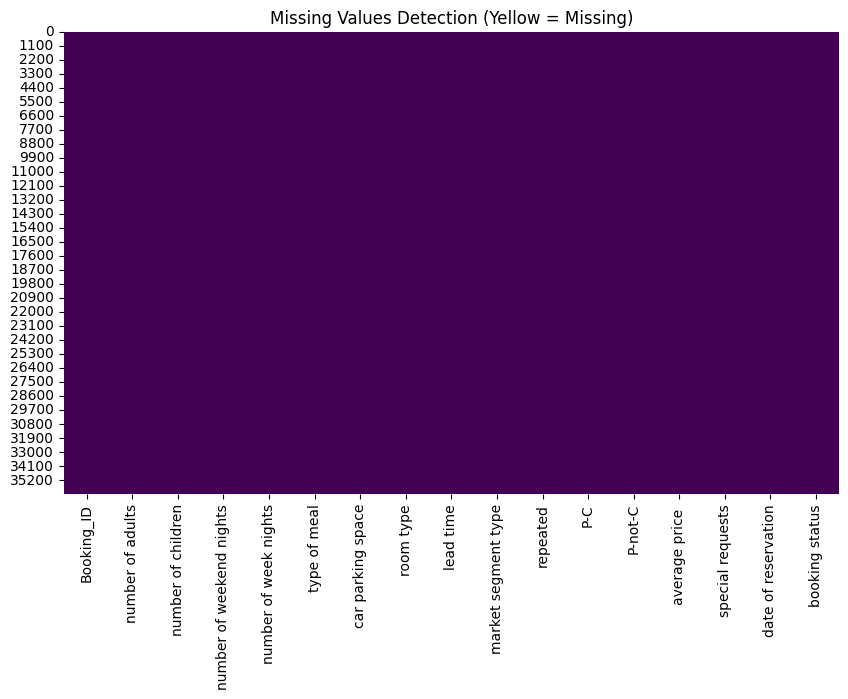

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Detection (Yellow = Missing)")
plt.show()

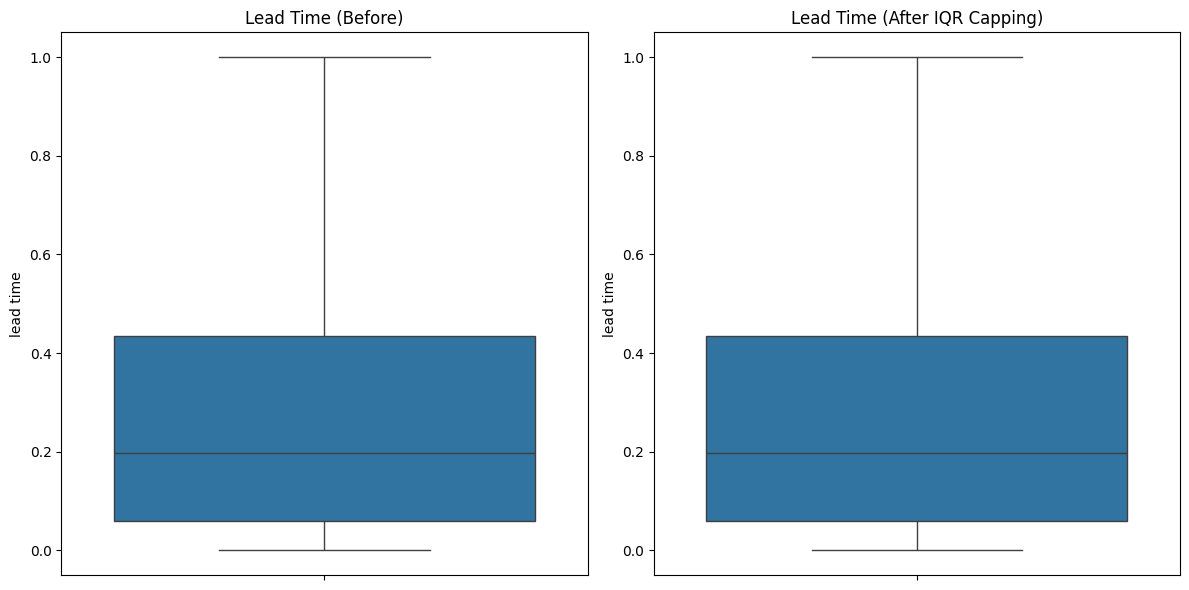

In [21]:
# Before treatment
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data=df, y='lead time')
plt.title("Lead Time (Before)")

# After treatment
plt.subplot(1,2,2)
sns.boxplot(data=df, y='lead time')
plt.title("Lead Time (After IQR Capping)")
plt.tight_layout()
plt.show()

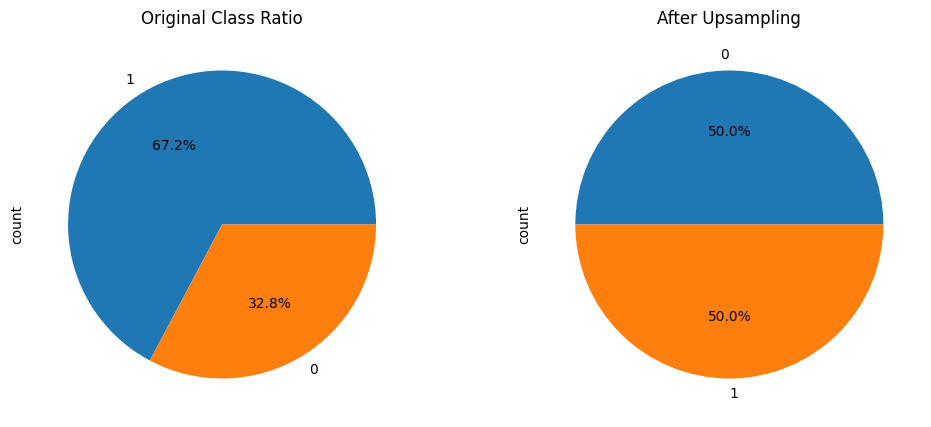

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
df['booking status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Original Class Ratio")

plt.subplot(1,2,2)
df_balanced['booking status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("After Upsampling")
plt.show()

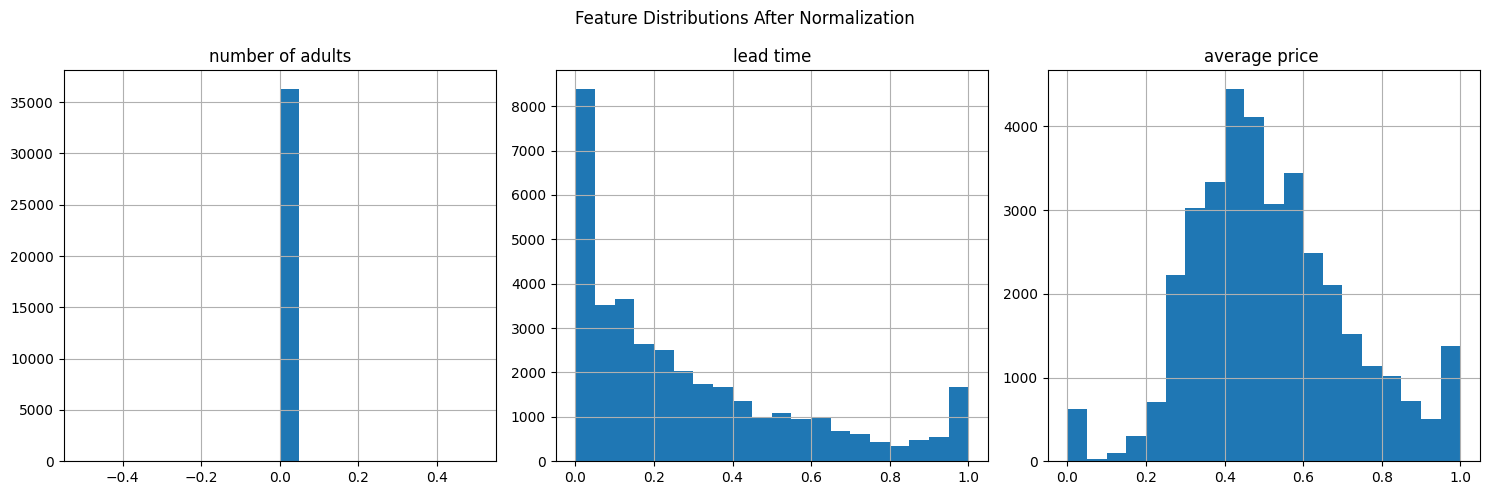

In [24]:
num_cols = ['number of adults', 'lead time', 'average price ']
df[num_cols].hist(bins=20, figsize=(15,5), layout=(1,3))
plt.suptitle("Feature Distributions After Normalization")
plt.tight_layout()
plt.show()

In [26]:
# STEP 1: Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# STEP 2: Fill missing values
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in categorical_cols:
    if df[col].isnull().any():  # Only fill if missing values exist
        df[col].fillna(df[col].mode()[0], inplace=True)

# Verify no missing values remain
print("Missing values after treatment:")
print(df.isnull().sum())

Missing values after treatment:
Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64


/tmp/ipython-input-26-3046848210.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [27]:
fill_dict = {
    'number of adults': df['number of adults'].median(),
    'number of children': df['number of children'].median(),
    'type of meal': df['type of meal'].mode()[0],
    'room type': df['room type'].mode()[0]
}
df.fillna(fill_dict, inplace=True)

In [29]:
assert df.isnull().sum().sum() == 0, "Missing values still exist!"
print(" All missing values handled successfully!")

 All missing values handled successfully!
